In [1]:
import pandas as pd 
import numpy as np
import os 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import datetime as dt
from wordcloud import WordCloud, STOPWORDS 

In [2]:
#Creating a dataframe 
df = pd.read_csv('cleaned-BA-reviews.csv')

# Let check if the index is in order 
df =  df.reset_index(drop=True)

In [3]:
df.head()

,Unnamed: 0,reviews,dates,countries,verified,corpus
0,0,✅ Trip Verified | British Airways has a total...,2023-09-04,United Kingdom,True,british airway total lack respect customer boo...
1,1,"✅ Trip Verified | London Heathrow to Keflavik,...",2023-09-04,Iceland,True,london heathrow keflavik iceland business clas...
2,2,✅ Trip Verified | Mumbai to London Heathrow in...,2023-09-04,Iceland,True,mumbai london heathrow business class ageing b...
3,3,✅ Trip Verified | Care and support shocking. ...,2023-09-04,United Kingdom,True,care support shocking written previously loyal...
4,4,✅ Trip Verified | Flying A380 business class ...,2023-09-02,Australia,True,flying business class pleasure ba made disaste...


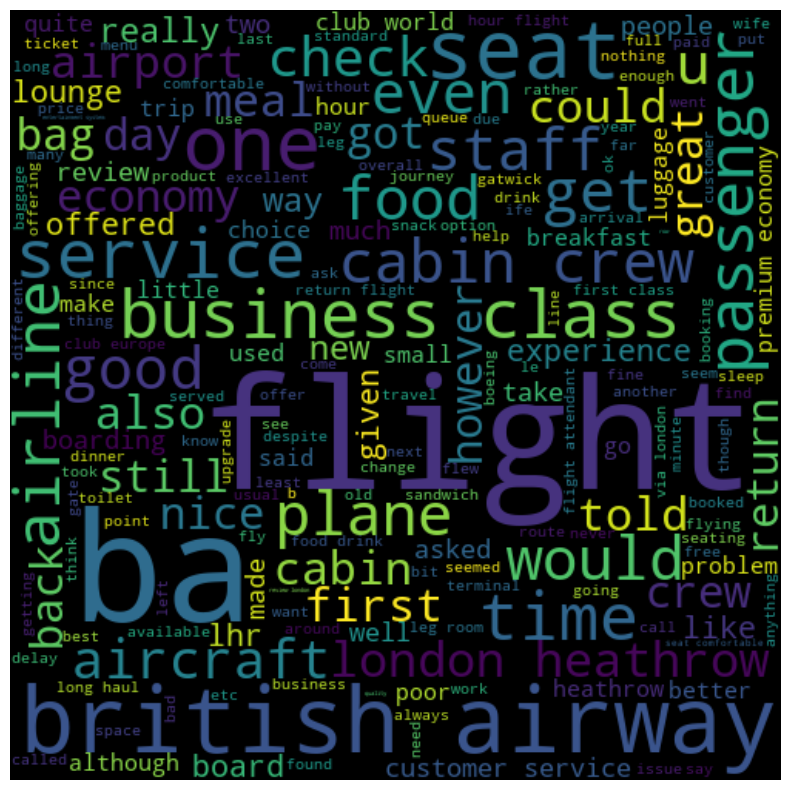

In [4]:
import nltk
from nltk.corpus import stopwords

# starting with one reviews 
reviews =  " ".join(df.corpus)
plt.figure(figsize = (20,10))

stopwords = set(stopwords.words('english'))

# create the word cloud image 
wordcloud =  WordCloud(height = 500, width = 500, max_font_size = 100, stopwords= stopwords).generate(reviews) 

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()


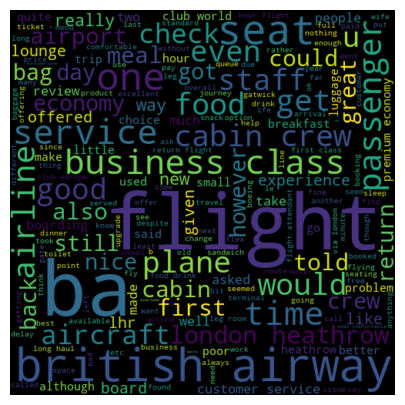

In [5]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.corpus)
plt.figure(figsize=(15,5))

stopwords = set(stopwords.words('english'))
stopwords.update(['flight', 'british', 'airways','airline', 'ba','would','get', 
                'one','heathrow',])

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is postive or negative along with the intensity of emotion.

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment 
def vadersentimentanalysis(reviews):
    vs = analyzer.polarity_scores(reviews)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,dates,countries,verified,corpus,Sentiment,Analysis
0,0,✅ Trip Verified | British Airways has a total...,2023-09-04,United Kingdom,True,british airway total lack respect customer boo...,-0.8759,Negative
1,1,"✅ Trip Verified | London Heathrow to Keflavik,...",2023-09-04,Iceland,True,london heathrow keflavik iceland business clas...,0.7218,Positive
2,2,✅ Trip Verified | Mumbai to London Heathrow in...,2023-09-04,Iceland,True,mumbai london heathrow business class ageing b...,0.9698,Positive
3,3,✅ Trip Verified | Care and support shocking. ...,2023-09-04,United Kingdom,True,care support shocking written previously loyal...,-0.0752,Negative
4,4,✅ Trip Verified | Flying A380 business class ...,2023-09-02,Australia,True,flying business class pleasure ba made disaste...,-0.9284,Negative


In [7]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    1803
Negative    1505
Neutral      335
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16f87c40050>,
 [Text(0.017548345951224086, 1.0998600163449785, 'Positive'),
  Text(-0.33016061855988577, -1.0492825958492562, 'Negative'),
  Text(1.2940561626417781, -0.38460193437999735, 'Neutral')],
 [Text(0.009571825064304046, 0.5999236452790792, '49.5%'),
  Text(-0.18008761012357402, -0.5723359613723216, '41.3%'),
  Text(0.8147761024040826, -0.24215677349851683, '9.2%')])

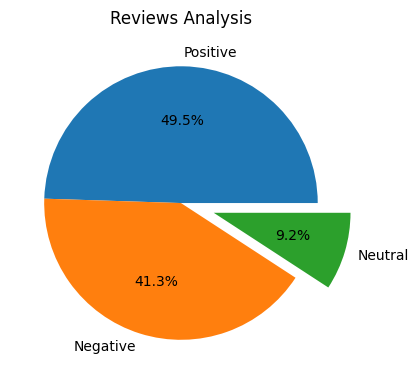

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode=(0, 0, 0.25), autopct= '%1.1f%%', shadow=False)

In [9]:
df.to_csv("Analysed_BA_reviews.csv")

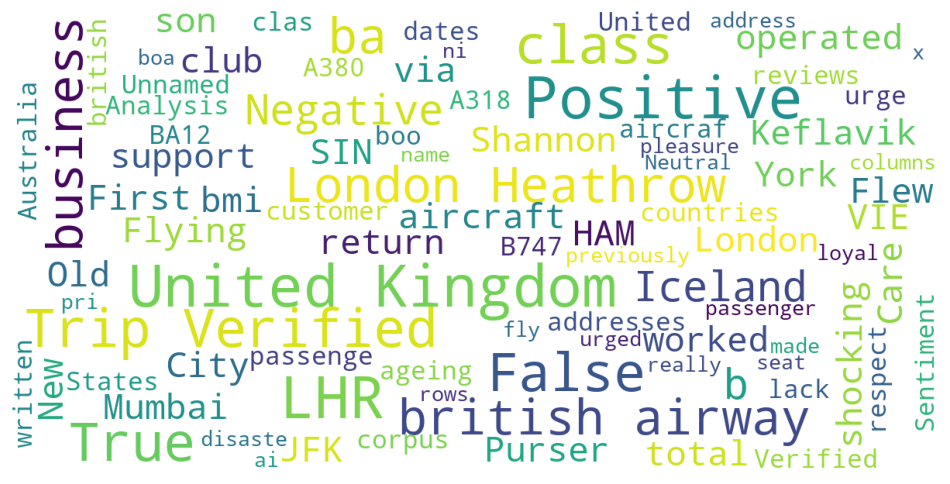

In [10]:
from wordcloud import WordCloud, STOPWORDS
stopwords =  set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=25,
        scale=3,
        random_state=1
    )

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1,figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df)

In [11]:
wordcloud.to_file("wordcloud.png")